In [35]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from math import ceil

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,
    accuracy_score, precision_score, recall_score, classification_report, 
    confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel, RFE, mutual_info_classif
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import StandardScaler

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Y lo mas importante :)
from toolbox_ML import *

In [36]:
# Carga de datos
# ==============================================================================
titanic = pd.read_csv('titanic.csv')
df_wine = pd.read_csv('WineQT.csv')
df_iris = pd.read_csv('iris.csv')

In [37]:
target_iris = 'target'
target_wine = 'quality'
target_titanic = 'survived'

### Funcion: eval_model

In [38]:
df_iris = df_iris.drop('iris_class', axis = 1)
df_iris[target_iris] = df_iris[target_iris].astype('category')
df_wine[target_wine] = df_wine[target_wine].astype('category')
titanic[target_titanic] = titanic[target_titanic].astype('category')
df_wine.dropna(inplace=True)
titanic.dropna(inplace=True)
categorical_cols = ['pclass', 'sex', 'embarked']
for col in categorical_cols:
    titanic[col] = titanic[col].astype('category')

In [39]:
X = df_iris.drop(columns=[target_iris])
y = df_iris[target_iris]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [40]:
metrics_class = ['ACCURACY', 'PRECISION', 'RECALL', 'CLASS_REPORT', 'MATRIX']

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



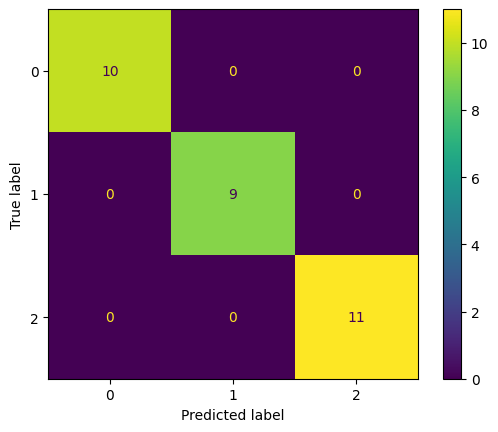

(1.0, 1.0, 1.0)

In [41]:
eval_model(y_test, y_pred, problem_type='classification', metrics=metrics_class)

In [42]:
X = df_wine.drop(columns=['alcohol'])
y = df_wine['alcohol']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [43]:
metrics_reg = ['RMSE', 'MAE', 'MAPE', 'GRAPH']

RMSE: 0.6310956409548255
MAE: 0.46697971133875343
MAPE: 0.043932525091158275


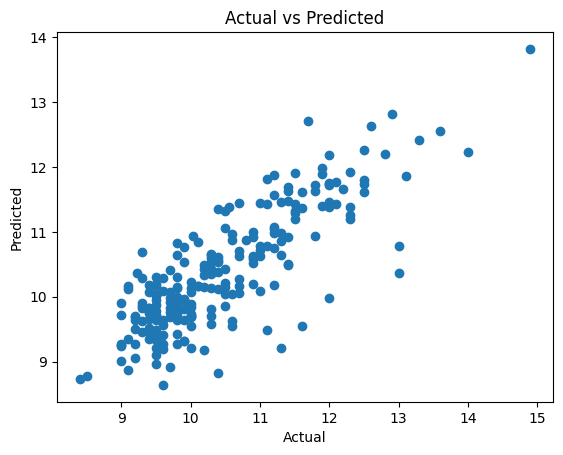

(0.6310956409548255, 0.46697971133875343, 0.043932525091158275)

In [44]:
eval_model(y_test, y_pred, problem_type='regression', metrics=metrics_reg)

In [45]:
X = titanic.drop(columns=['survived'])
y = titanic['survived']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [46]:
metrics = ['RECALL', 'MATRIX_RECALL', 'MATRIX_PRED', 'RECALL_0', 'RECALL_1']

Recall: 0.9545454545454546


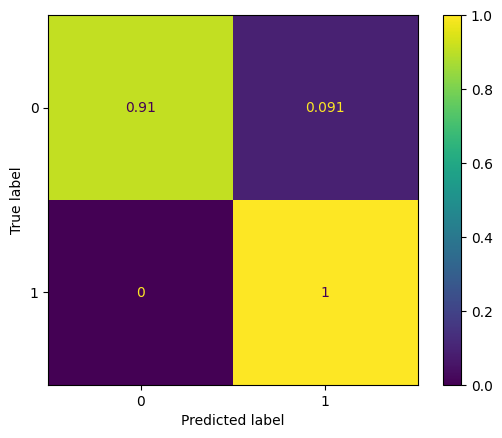

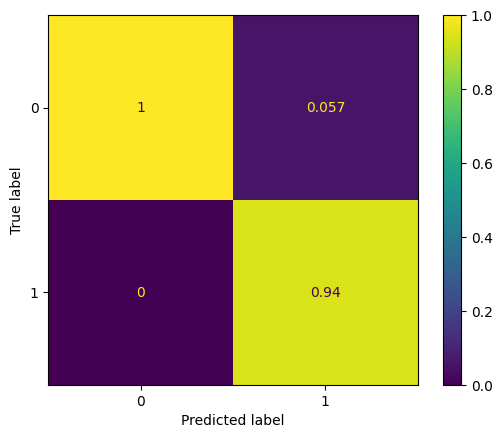

Recall for 0: 0.9090909090909091
Recall for 1: 1.0


(0.9545454545454546, 0.9090909090909091, 1.0)

In [47]:
eval_model(y_test, predictions, problem_type='classification', metrics=metrics)


### Funcion: get_features_num_classification

In [48]:
get_features_num_classification(df_iris, target_iris)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [49]:
get_features_num_classification(df_iris, 'patata')

La columna 'patata' no existe en el DataFrame.


In [50]:
get_features_num_classification(df_wine, target_wine, pvalue=0.0005)

['volatile acidity',
 'citric acid',
 'total sulfur dioxide',
 'density',
 'sulphates',
 'alcohol']

In [51]:
get_features_num_classification(titanic, target_titanic, pvalue=1)

['age', 'sibsp', 'parch', 'fare']

### Funcion: plot_features_num_classification

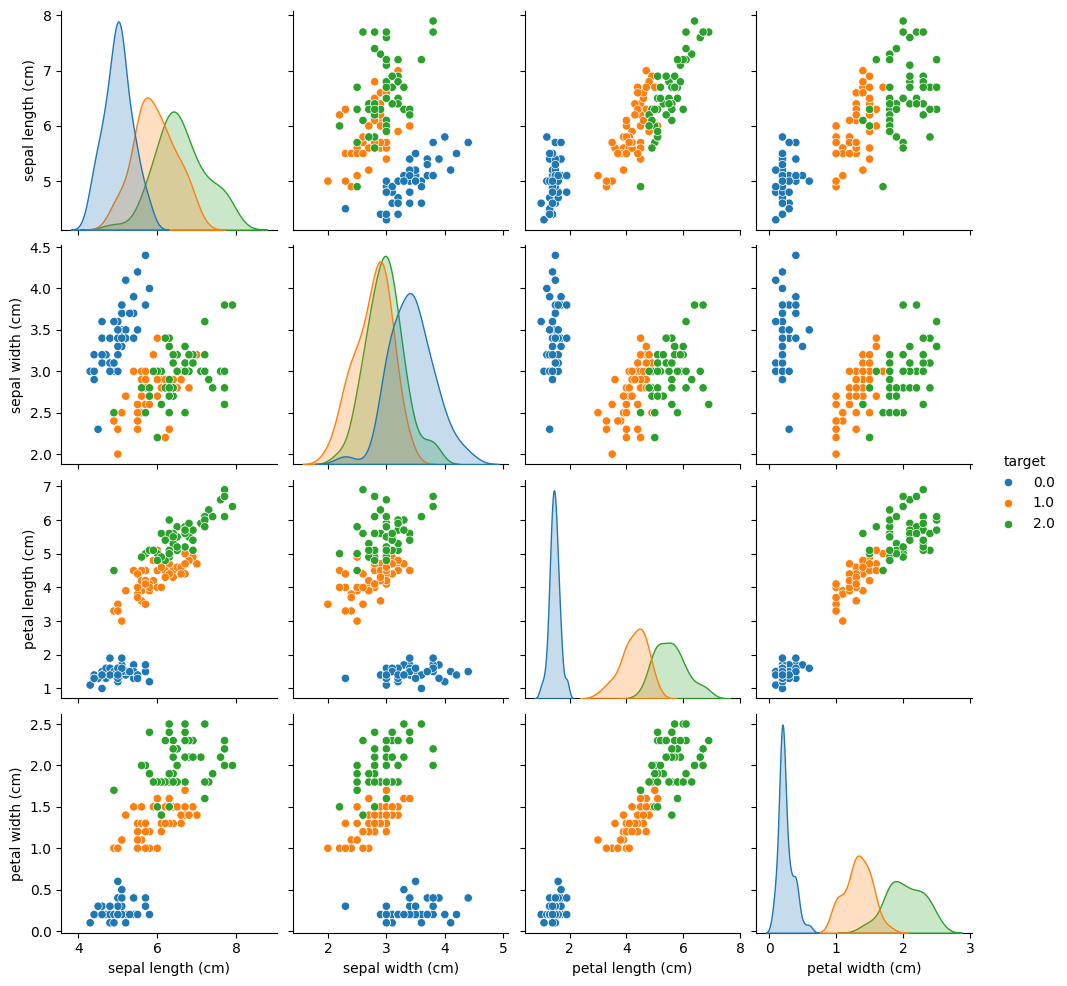

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target']

In [52]:
plot_features_num_classification(df_iris, target_iris, pvalue=0.05)

### Funcion: get_features_cat_classification

In [69]:
get_features_cat_classification(df_wine, target_wine, normalize=False)

['quality']

In [54]:
get_features_cat_classification(df_wine, 'patata', normalize=False)

La columna 'patata' no existe en el DataFrame.


In [68]:
get_features_cat_classification(df_wine, 'chlorides')

La columna 'chlorides' no es categórica ni numérica discreta.


In [66]:
get_features_cat_classification(df_iris, target_iris, normalize=True, mi_threshold=2)

El umbral de información mutua '2' debe ser un float entre 0 y 1 cuando normalize es True.


In [58]:
get_features_cat_classification(titanic, target_titanic, normalize=True, mi_threshold=0.05)

['survived', 'sex', 'who', 'alive']

### Funcion: plot_features_cat_classification

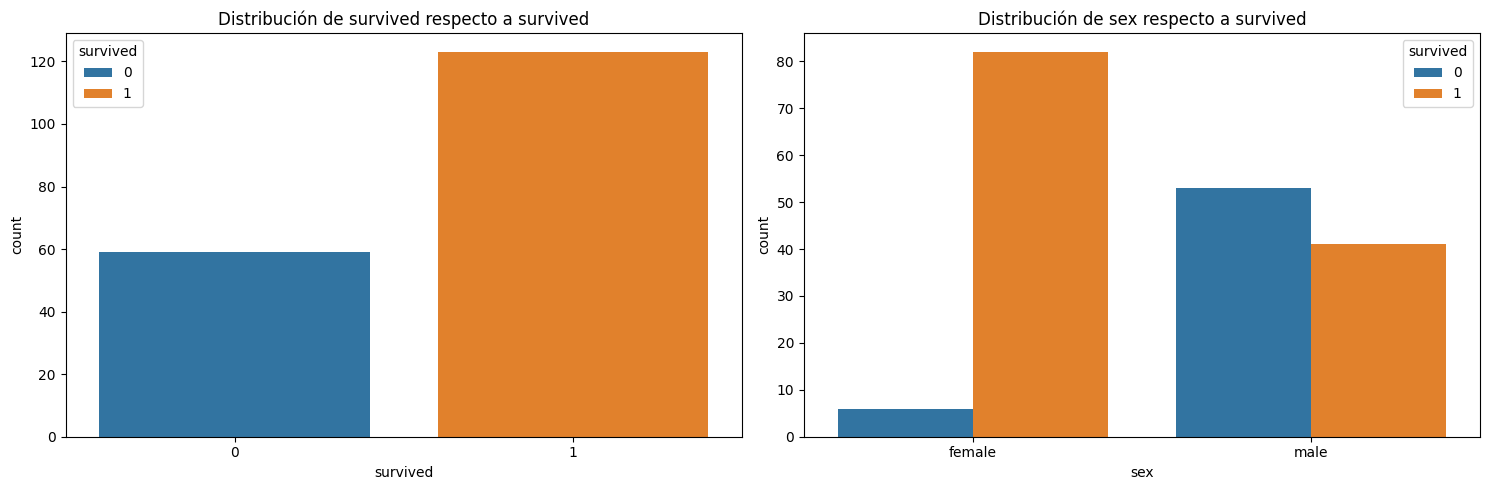

['survived', 'sex']

In [59]:
plot_features_cat_classification(titanic, target_titanic, mi_threshold=0.05, normalize=True)

### Funcion: super_selector 

In [60]:
selectores_wine = {
    "KBest": 5,
    "FromModel": [RandomForestClassifier(n_estimators=100), 5],
    "RFE": (LogisticRegression(max_iter=1000), 5, 1),
    "SFS": (LogisticRegression(max_iter=1000), 5)
}

In [61]:
super_selector(df_wine, target_wine, selectores_wine, ["alcohol", "malic_acid", "ash", "alcalinity_of_ash", "magnesium"])

{'KBest': ['volatile acidity',
  'citric acid',
  'total sulfur dioxide',
  'sulphates',
  'alcohol'],
 'FromModel': ['volatile acidity',
  'total sulfur dioxide',
  'sulphates',
  'alcohol',
  'Id'],
 'RFE': ['volatile acidity',
  'total sulfur dioxide',
  'density',
  'alcohol',
  'Id'],
 'SFS': ['volatile acidity',
  'chlorides',
  'total sulfur dioxide',
  'sulphates',
  'alcohol'],
 'hard_voting': ['alcohol',
  'volatile acidity',
  'total sulfur dioxide',
  'sulphates',
  'Id',
  'citric acid',
  'density',
  'chlorides',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium']}

In [62]:
selectores_iris = {
    "KBest": 3,
    "FromModel": [RandomForestClassifier(n_estimators=100), 3],
    "RFE": (LogisticRegression(max_iter=1000), 3, 1),
    "SFS": (LogisticRegression(max_iter=1000), 3)
}

In [63]:
super_selector(df_iris, target_iris, selectores_iris, ["sepal_length", "sepal_width", "petal_length", "petal_width"])

{'KBest': ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
 'FromModel': ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
 'RFE': ['sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
 'SFS': ['sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
 'hard_voting': ['petal length (cm)',
  'petal width (cm)',
  'sepal length (cm)',
  'sepal width (cm)',
  'sepal_length',
  'sepal_width',
  'petal_length',
  'petal_width']}

In [64]:
selectores_titanic = {
    "KBest": 5,
    "FromModel": [RandomForestClassifier(), 5],
    "RFE": (LogisticRegression(max_iter=1000), 5, 1)
}

In [65]:
super_selector(titanic, target_titanic, selectores_titanic, ["pclass", "who", "embarked", "fare", "age"])

{'KBest': ['sex', 'age', 'fare', 'who', 'adult_male'],
 'FromModel': ['sex', 'age', 'who', 'adult_male', 'alive'],
 'RFE': ['sex', 'age', 'who', 'adult_male', 'alive'],
 'hard_voting': ['age',
  'who',
  'sex',
  'adult_male',
  'fare',
  'alive',
  'pclass',
  'embarked']}